In [168]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, auc, accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import metrics

In [169]:
df_sissi = pd.DataFrame(pd.read_excel("D:/Masterarbeit/2.Versuch/Data/REDfold_Excel/POS_SAMPLES.xlsx"))
df_sissiz_mono = pd.DataFrame(pd.read_excel("D:/Masterarbeit/2.Versuch/Data/REDfold_Excel/SISSIz_MONO.xlsx"))
df_sissiz_di = pd.DataFrame(pd.read_excel("D:/Masterarbeit/2.Versuch/Data/REDfold_Excel/SISSIz_DI.xlsx"))
df_multiperm_mono = pd.DataFrame(pd.read_excel("D:/Masterarbeit/2.Versuch/Data/REDfold_Excel/MULTIPERM_MONO.xlsx"))
df_multiperm_di = pd.DataFrame(pd.read_excel("D:/Masterarbeit/2.Versuch/Data/REDfold_Excel/MULTIPERM_DI.xlsx"))
df_aln_shuffle = pd.DataFrame(pd.read_excel("D:/Masterarbeit/2.Versuch/Data/REDfold_Excel/ALIFOLDz.xlsx"))

In [170]:
filter = 50000

df_sissi_filterd = df_sissi[(df_sissi['Score'] >= -filter) & (df_sissi['Score'] <= filter)]
df_sissiz_mono_filterd = df_sissiz_mono[(df_sissiz_mono['Score'] >= -filter) & (df_sissiz_mono['Score'] <= filter)]
df_sissiz_di_filterd = df_sissiz_di[(df_sissiz_di['Score'] >= -filter) & (df_sissiz_di['Score'] <= filter)]
df_multiperm_mono_filterd = df_multiperm_mono[(df_multiperm_mono['Score'] >= -filter) & (df_multiperm_mono['Score'] <= filter)]
df_multiperm_di_filterd = df_multiperm_di[(df_multiperm_di['Score'] >= -filter) & (df_multiperm_di['Score'] <= filter)]
df_aln_shuffle_filterd = df_aln_shuffle[(df_aln_shuffle['Score'] >= -filter) & (df_aln_shuffle['Score'] <= filter)]

In [171]:
# df_sissi = pd.DataFrame(pd.read_excel("C:/bla/Waste/MA/2.Versuch/REDfold_Excel/sissi.xlsx"))
# df_sissiz_mono = pd.DataFrame(pd.read_excel("C:/bla/Waste/MA/2.Versuch/REDfold_Excel/sissiz_mono.xlsx"))
# df_sissiz_di = pd.DataFrame(pd.read_excel("C:/bla/Waste/MA/2.Versuch/REDfold_Excel/sissiz_di.xlsx"))
# df_multiperm_mono = pd.DataFrame(pd.read_excel("C:/bla/Waste/MA/2.Versuch/REDfold_Excel/multiperm_mono.xlsx"))
# df_multiperm_di = pd.DataFrame(pd.read_excel("C:/bla/Waste/MA/2.Versuch/REDfold_Excel/multiperm_di.xlsx"))
# df_aln_shuffle = pd.DataFrame(pd.read_excel("C:/bla/Waste/MA/2.Versuch/REDfold_Excel/alifoldz.xlsx"))

In [172]:
df_sissi[['Score']].describe()

,Score
count,3.900000e+04
mean,1.156769e+05
std,1.181970e+05
min,-1.254000e+02
25%,-9.340000e+00
50%,9.998120e+04
75%,1.999843e+05
max,1.000088e+06


In [173]:
df_sissiz_mono[['Score']].describe()

,Score
count,39000.000000
mean,105701.704167
std,114519.385281
min,-43.600000
25%,31.590000
50%,100014.540000
75%,200013.910000
max,700052.190000


In [174]:
df_sissiz_di[['Score']].describe()

,Score
count,39000.000000
mean,109605.745635
std,112443.569103
min,-50.290000
25%,33.190000
50%,100018.105000
75%,200015.200000
max,800056.190000


In [175]:
df_multiperm_mono[['Score']].describe()

,Score
count,39000.000000
mean,111343.951485
std,114876.582673
min,-64.200000
25%,32.187500
50%,100018.250000
75%,200019.285000
max,900053.250000


In [176]:
df_multiperm_di[['Score']].describe()

,Score
count,39000.000000
mean,113376.578888
std,116231.235333
min,-57.200000
25%,35.385000
50%,100021.000000
75%,200022.912500
max,900103.690000


In [177]:
df_aln_shuffle[['Score']].describe()

,Score
count,3.900000e+04
mean,1.176588e+05
std,1.183421e+05
min,-6.300000e+01
25%,2.350000e+01
50%,1.000087e+05
75%,2.000151e+05
max,1.300079e+06


In [ ]:
def createResultsFromExcel(dataframes):
    labels = ['SISSI', 'SISSIz_mono', 'SISSIz_di', 'Multiperm_mono', 'Multiperm_di', 'aln-shuffle']
    data = [df['Score'] for df in dataframes]
    thresholds = [0]

    plt.figure(figsize=(12, 8))
    plt.boxplot(data, labels=labels)

    for t in thresholds:
        plt.axhline(y=t, color='red', linestyle='--', linewidth=1)

    plt.axvspan(0.5, 1.5, color="darkgray", alpha=0.75, edgecolor="black", label='Positive Samples')
    plt.axvspan(1.5, 3.5, color="sandybrown", alpha=0.75, edgecolor="black", label='Simulation')
    plt.axvspan(3.5, 6.5, color="mediumpurple", alpha=0.75, edgecolor="black", label='Shuffle')

    plt.title('Boxplot REDfold with RNAeval Score')
    plt.legend()
    plt.show()

C:\Users\Stefan\AppData\Local\Temp\ipykernel_18844\211907527.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels)
C:\Users\Stefan\AppData\Local\Temp\ipykernel_18844\211907527.py:12: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(0.5, 1.5, color="darkgray", alpha=0.75, edgecolor="black", label='Positive Samples')
C:\Users\Stefan\AppData\Local\Temp\ipykernel_18844\211907527.py:13: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(1.5, 3.5, color="sandybrown", alpha=0.75, edgecolor="black", label='Simulation')
C:\Users\Stefan\AppData\Local\Temp\ipykernel_18844\211907527.py:14: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(3.5, 6.5, color="mediumpurple", 

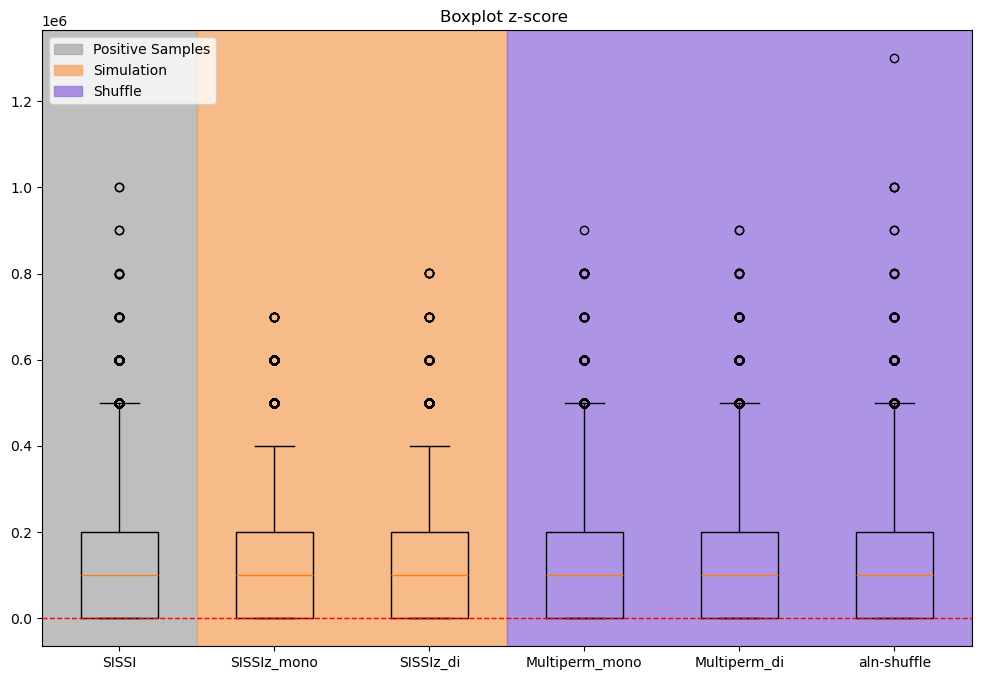

In [179]:
dataframes = [df_sissi, df_sissiz_mono, df_sissiz_di, df_multiperm_mono, df_multiperm_di, df_aln_shuffle]
createResultsFromExcel(dataframes)

## Here are the filtered data of the RNAeval results 

C:\Users\Stefan\AppData\Local\Temp\ipykernel_18844\211907527.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels)
C:\Users\Stefan\AppData\Local\Temp\ipykernel_18844\211907527.py:12: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(0.5, 1.5, color="darkgray", alpha=0.75, edgecolor="black", label='Positive Samples')
C:\Users\Stefan\AppData\Local\Temp\ipykernel_18844\211907527.py:13: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(1.5, 3.5, color="sandybrown", alpha=0.75, edgecolor="black", label='Simulation')
C:\Users\Stefan\AppData\Local\Temp\ipykernel_18844\211907527.py:14: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(3.5, 6.5, color="mediumpurple", 

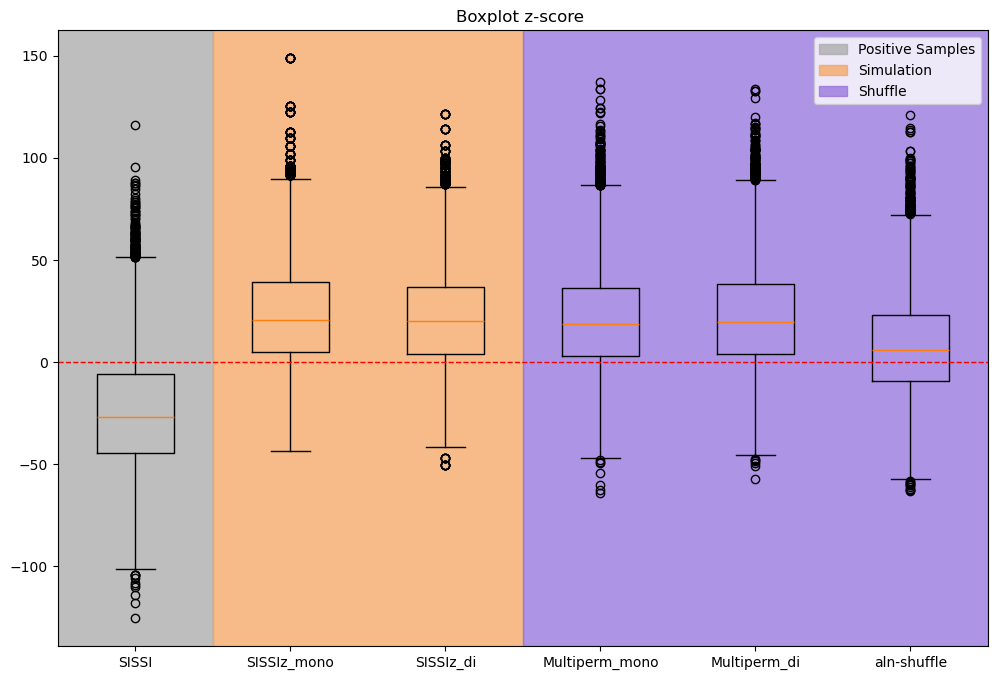

In [180]:
dataframes_filterd = [df_sissi_filterd, df_sissiz_mono_filterd, df_sissiz_di_filterd, df_multiperm_mono_filterd, df_multiperm_di_filterd, df_aln_shuffle_filterd]
createResultsFromExcel(dataframes_filterd)